In [36]:
import cv2
import pandas as pd
import mediapipe as mp
from PIL import Image

import os
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import cv2

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,make_scorer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from random import uniform
from scipy.stats import randint
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,log_loss

import io
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout

import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt


import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
from sklearn.model_selection import cross_val_score

from tensorflow.keras.optimizers import Adam

from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
#import matplotlib as plt
from keras.callbacks import LearningRateScheduler
import numpy as np


from tensorflow.keras.models import save_model
import tensorflow as tf

# The files to create dataframe from dataset
#ball_release = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\tossstartframes.csv",header=None)
data_path = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\CSVs\\"
#test_data = pd.read_excel(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\model_inout\test_25-06.xlsx")
frames = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\frames.csv")
#cont_frames = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\contactframes.csv")
#ball_toss = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\tossstartframes.csv")

#pip install tensorflow==2.7.0 --user

In [2]:
def process_video(cap):        
        #importing required libraries from mediapipe to draw and to perfom pose estimation from the video
        mp_drawing = mp.solutions.drawing_utils
        mp_pose = mp.solutions.pose

        #Initializing an empty dataframe with the required body landmarks as columns of a dataframe
        df = pd.DataFrame(columns = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
               'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
               'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
               'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
               'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
               'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
               'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
               'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
               'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
               'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
               'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
               'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
               'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
               'RIGHT_FOOT_INDEX_Z'])


        #Reading the video using CV2
        #output_file = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\individual serves - side camera\Kev's Serves\output_data.json"
        pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=2)

        # The mininimum detection confidance and tracking confidence of mediapipe is set to 0.5 and while video is opened the it is
        # extracted into frames and landmarks are extracted from each frame and saved it as each row of dataframe 'df'

        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            while cap.isOpened():


                ret, frame = cap.read()


                #flipped_frame = cv2.flip(frame, 1)

                #pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

                #pil_image.show()


                if not ret:

                    break

                else:
                    #print(ret,"\n")
                    RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


                    results = pose.process(RGB)

                    if results.pose_landmarks == None:

                        continue

                    else:

                        landmarks = results.pose_landmarks.landmark

                        #print("Cord------",landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)

                        nose_x =  landmarks[mp_pose.PoseLandmark.NOSE.value].x
                        nose_Y =  landmarks[mp_pose.PoseLandmark.NOSE.value].y
                        nose_z =  landmarks[mp_pose.PoseLandmark.NOSE.value].z

                        left_sho_x = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x
                        left_sho_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
                        left_sho_z = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z

                        right_sho_x = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x
                        right_sho_y = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y
                        right_sho_z = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z

                        left_elb_x = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x
                        left_elb_y = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y
                        left_elb_z = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z

                        right_elb_x = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x
                        right_elb_y = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y
                        right_elb_z = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z

                        left_wrist_x = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x
                        left_wrist_y = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y
                        left_wrist_z = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z

                        right_wrist_x = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x
                        right_wrist_y = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y
                        right_wrist_z = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].z

                        left_hip_x = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x
                        left_hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y
                        left_hip_z = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z

                        right_hip_x = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x
                        right_hip_y = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y
                        right_hip_z = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z

                        left_knee_x = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x
                        left_knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y
                        left_knee_z = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z

                        right_knee_x = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x
                        right_knee_y = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y
                        right_knee_z = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z           

                        left_ankle_x = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x
                        left_ankle_y = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y
                        left_ankle_z = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].z

                        right_ankle_x = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x
                        right_ankle_y = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y
                        right_ankle_z = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z

                        left_heel_x = landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x
                        left_heel_y = landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y
                        left_heel_z = landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].z

                        right_heel_x = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x
                        right_heel_y = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y
                        right_heel_z = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].z

                        left_foot_index_x = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x
                        left_foot_index_y = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y
                        left_foot_index_z = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].z

                        right_foot_index_x = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x
                        right_foot_index_y = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y
                        right_foot_index_z = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].z

                        #res_list.append([nose_x,nose_Y,nose_z,left_sho_x,left_sho_y,left_sho_z,right_sho_x,right_sho_y,right_sho_z,left_elb_x,left_elb_y,left_elb_z,right_elb_x,right_elb_y,right_elb_z,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z,left_knee_x,left_knee_y,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_z,left_heel_x,left_heel_y,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z])


                        data_row = [nose_x,nose_Y,nose_z,left_sho_x,left_sho_y,left_sho_z,right_sho_x,right_sho_y,right_sho_z,left_elb_x,left_elb_y,left_elb_z,right_elb_x,right_elb_y,right_elb_z,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z,left_knee_x,left_knee_y,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_y,right_ankle_z,left_heel_x,left_heel_y,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z]



                        df.loc[len(df)] = data_row
                        #print("---------",data_row)
                        #df.append(data_row, ignore_index=True)

                mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        return df        

In [3]:
#Function for data prepration: It classifyies the 'Class 1' and 'Class 2' and integrate the complete files into a single dataframe.

def classify_data(range_value,file,data_path):
    data_list = []
    class_list = []
    ball_toss = []
    
    df = pd.DataFrame()
    
    #print("---------",frames)
    for i in range(len(file)):
            #print(i)
            file_name = file.iloc[i][0]
            #print("----",file_name)
            toss_row = file.iloc[i][1]
            hit_row = file.iloc[i][2]

            for csv in os.listdir(data_path): 
                
                if file_name in csv:
                        #print("\n",file_name)
                        data = pd.read_csv(data_path+"\\"+csv)
                        #print(data)
                        
                        
                        
                        class_list = ["Before" for i in range(0,hit_row-range_value)]
                        class_list.extend(["Hit" for i in range(hit_row-range_value,hit_row+range_value)])
                        class_list.extend(["After" for i in range(hit_row+range_value,len(data))])

                        ball_toss = ["Before Toss" for i in range(0,toss_row-range_value)]
                        ball_toss.extend(["Toss" for i in range(toss_row-range_value,toss_row+range_value)])
                        ball_toss.extend(["After Toss" for i in range(toss_row+range_value,len(data))])

                        file_list = [file_name for i in range(len(data))]
                        data = data.assign(File=file_list,Class_1=class_list,Class_2=ball_toss)
                        data_list.append(data)   
                        dataframe = pd.concat(data_list)
                        #print(dataframe)
                        
    return dataframe

In [4]:
#Function to calculate the angle between two body landmark by taking the x,y co-ordinates of both points

def cal_ang(i,j,k,l):
    
    
    angle_rad = []
    sho_rand_angle = []
    
    for x1,y1,x2,y2 in zip(i,j,k,l):
        
        
    
        angle_rad.append(math.atan2( y2 - y1 , x2 - x1 ))
        #angle_deg = math.degrees(angle_rad)
        #nose_wrist_angle.append(pygame.math.Vector2(x1, y1).angle_to((x2, y2)))
    
        
    return angle_rad


In [5]:
#Checks and correct the prediction by multi-classifier model by checking the conditions like it should be in "Before"-"Hit"/"Toss"-"After" order
def pred_check(arr):

    for i in range(len(arr) - 1):
        
        if (arr[i] == 1 and arr[i-1] == 1) and (arr[i + 1] == 0 ) :
            
            arr[i + 1] = 2
        
        elif (arr[i] == 2)  and (arr[i + 1] == 1):
            
            arr[i + 1] = 0
        
        elif (arr[i] == 0 and arr[i+1] == 1):
            arr[i+1] = 0
        
    
    return arr


In [6]:
#Find the mean square error of prediction for each alpha value and finds the most suitable alpha which has the least mean square error.
def best_alpha(X_train,y_train):    
    alp = np.logspace(-10, 10, 100)  

    lasso_cv = LassoCV(alphas=alp, cv=5)  

    lasso_cv.fit(X_train, y_train)

    alpha_val = lasso_cv.alpha_

    print("Best Alpha:", alpha_val)

    final_lasso = Lasso(alpha=alpha_val)
    final_lasso.fit(X_train, y_train)

    y_pred = final_lasso.predict(X_test)
    mean_sq_err = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mean_sq_err)
    return mean_sq_err

In [7]:
#Extract the coefficient value which helps to identify the relevence of the feature by Lasso Regression cross validation
def lasso_cross_val(X_train,X_test,y_train,y_test):
    
    coef_lis =[]

    lasso = Lasso(alpha=1e-10)

    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)

    mean_sq_err = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mean_sq_err)

    coeff = pd.DataFrame({'Features': X_train.columns, 'Coefficients': lasso.coef_})


    for j in range(len(coeff)):
        if coeff.iloc[j][1]!= 0:
            coef_lis.append((coeff.iloc[j][0]))

    print(([i for i in coeff['Coefficients'] if i!=0]))
    
    return coef_lis    
#coef_lis.append('Nose_Right_Wrist_Angle')
#coef_lis.append('Right_Sho_Wrist Angle') 
#coef_lis.append('Nose_Right_Elbow')
         
        
#coef_lis.append('Left_Sho_Wrist_Angle')
#coef_lis.append('Nose_Left_Wrist') 
#coef_lis.append('Nose_Left_Elbow')
    



Random Search

In [8]:
#Function to check different hyperparameter values for XG Boost and perform random search to find the best hyperparameter values

def xgb_randomsearch(new_X_train, y_train):  
    #params = {
 #   'subsample': 0.7,
 #   'reg_lambda': 50.0,
 #   'n_estimators': 100,
 #   'min_child_weight': 5.0,
 #   'max_depth': 6,
 #   'learning_rate': 0.2,
 #   'gamma': 1.0,
 #   'colsample_bytree': 0.9,
 #   'colsample_bylevel': 0.4,}

    #params ={'bootstrap': True,'class_weight': 'balanced_subsample','criterion': 'entropy','max_depth': 5,'max_features': 10,'min_samples_split': 10,'eval_metric': f1_score}

    #params = {'gamma': 0,'max_depth': 4,'min_child_weight': 1,'n_estimators': 100,'reg_alpha': 0.1,'reg_lambda': 0.2,'scale_pos_weight': 3}

    #param = {"n_estimators": [100,150],  "max_depth": [3, 4, 5, 6], "min_child_weight": randint(1, 10),"gamma": [0, 0.1, 0.2, 0.3],"reg_alpha": [0, 0.1, 0.2, 0.3],"reg_lambda": [0, 0.1, 0.2, 0.3],"scale_pos_weight": [1, 3, 5],}
    
    param_grid = {'gamma': 0,'max_depth': 4,'min_child_weight': 1,'n_estimators': 100,'reg_alpha': 0.1,'reg_lambda': 0.2,'scale_pos_weight': 3}



    xg_model = XGBClassifier(objective="multi:softmax", num_class=3)

    folds = 5
    param_comb = 100     

    skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = None)

    random_search = RandomizedSearchCV(xg_model, param_distributions=param_grid, n_iter=param_comb, scoring='f1_macro', cv=skf.split(new_X_train,y_train), verbose=3, random_state=None )
    random_search.fit(new_X_train, y_train)

    return random_search.best_params_,random_search.best_score_

In [9]:
#Function to check different hyperparameter values for Random Forest and perform random search to find the best hyperparameter values

def randomforest_randsearch(new_X_train, y_train):
    params = {'bootstrap': True,'class_weight': 'balanced_subsample','criterion': 'entropy','max_depth': 5,'max_features': 10,'min_samples_split': 10}
    params = {'bootstrap': True,'class_weight': 'balanced','criterion': 'gini','max_depth': 5,'max_features': 9,'min_samples_split': 9}
    
    
    rf = RandomForestClassifier(n_estimators=100)
  
    random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=100, cv=5)
    random_search.fit(new_X_train, y_train)
    return random_search.best_params_,random_search.best_score_

In [10]:
#Function to pickle any models 
def save_tunedmodel(model):    
    filename = r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\XGBoost.sav'
    pickle.dump(model, open(filename, 'wb'))

In [43]:
#Function to draw AUC ROC curve for binary classification models

def draw_auc(y_test, y_pred):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [12]:
#Function to identify the data row for key frames using the output of multiclassification models
# The frames from Toss row till Hit row is selected.

def find_index(dataframe):
    go = "Not found"
    stop = "Not found"
    
    for i,j in enumerate(df["Class_2"]):
    
        if j == 2:
            go = i
            break
    if go == "Not found":
        
        print("Unable to detect Toss activity in video or the player is not using right hand!!!")
        
    for u,v in enumerate(dataframe['Class_1']):
        
        if v == 2:
            stop = u 
        
    if stop == "Not found":
        
        print("Unable to detect Hit activity in video or the player is not using right hand!!!")


    return go,stop

In [13]:
#Functions to draw train loss versus validation loss for binary classification models

def loss_graph(train_loss,val_loss):    
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()


In [14]:
#Function to evaluate the models using accuracy, confusioin matrix and classification report.

def model_perfomance(test,prediction):
    accuracy = accuracy_score(test,prediction)
    conf_matrix = confusion_matrix(test,prediction)
    class_report = sklearn.metrics.classification_report(test,prediction)
    
    return accuracy,conf_matrix,class_report

In [75]:
#Function to calculate the professionalism of the player and shows a message out.

def message(out):
    size = out
    toss = out[:15]
    mid = out[15:-15]
    hit = out[-15:]
    hit_am = np.count_nonzero(hit == 1)
    toss_am = np.count_nonzero(toss == 1)
    mid_am = np.count_nonzero(mid == 1)
    
    #print("---------------------",hit_am,toss_am,mid_am)
    flag_hit = 0
    flag_mid = 0
    flag_toss = 0
    
    value = out.mean()
    
    if value > 0.5:
        print("Hello.............\nYou are",int(value*100),"% Professional!!!")
    else:
        print("Hello.............\nYou are an unprofessional Player...")
    
    
    if hit_am > np.round(len(hit)/5):
        flag_hit = 1    
    if toss_am > np.round(len(toss)/5):  
        flag_toss = 1
    if mid_am > np.round(len(mid)/5):
        flag_mid = 1


    if value==1 :
        print("Your way of tossing, getting prepared to hit the ball and finally hitting the ball are a completely professional!!!!")
    elif flag_hit == 0 and flag_toss == 0 and flag_mid == 0:
        print("Your way of tossing the ball and getting prepared for hitting the ball and the hit can be improved..")
    elif flag_hit and flag_mid == 0:
        print("Your way of tossing the ball is Professional but hitting the ball and getting prepared for hitting the ball can be improved..")
    elif flag_hit and flag_toss == 0:
        print("Your way of getting prepared for hitting the ball is Professional but tossing the ball and Hitting the ball can be improved..")
    elif flag_toss and flag_mid == 0:
        print("Your way of Hitting the ball is more like a Professional but tossing the ball and getting prepared for hitting the ball can be improved..")


In [363]:
model_data.columns

Index(['Unnamed: 0', 'NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X',
       'LEFT_SHOULDER_Y', 'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X',
       'RIGHT_SHOULDER_Y', 'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y',
       'LEFT_ELBOW_Z', 'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z',
       'LEFT_WRIST_X', 'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X',
       'RIGHT_WRIST_Y', 'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y',
       'LEFT_HIP_Z', 'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z',
       'LEFT_KNEE_X', 'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X',
       'RIGHT_KNEE_Y', 'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y',
       'LEFT_ANKLE_Z', 'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z',
       'LEFT_HEEL_X', 'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X',
       'RIGHT_HEEL_Y', 'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X',
       'LEFT_FOOT_INDEX_Y', 'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X',
       'RIGHT_FOOT_INDEX_Y', 'RIGHT_FOOT_INDEX_Z', 'File', 'Class_1',
       'Class_2', 'Clas

In [377]:
feature_columns = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
       'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
       'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
       'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
       'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
       'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
       'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
       'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
       'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
       'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
       'RIGHT_FOOT_INDEX_Z' ,'Left_Sho_Wrist_Angle','Nose_Left_Wrist',
    'Nose_Left_Elbow','Nose_Right_Wrist_Angle','Right_Sho_Wrist Angle','Nose_Right_Elbow','Class_1','Class_2']

In [365]:
model_data = classify_data(12,frames,data_path)


nose_ryt_wrist = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['RIGHT_WRIST_X'],model_data['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(model_data['RIGHT_SHOULDER_X'],model_data['RIGHT_SHOULDER_Y'],model_data['RIGHT_WRIST_X'],model_data['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['RIGHT_ELBOW_X'],model_data['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(model_data['LEFT_SHOULDER_X'],model_data['LEFT_SHOULDER_Y'],model_data['LEFT_WRIST_X'],model_data['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['LEFT_WRIST_X'],model_data['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['LEFT_ELBOW_X'],model_data['LEFT_ELBOW_Y'])


model_data['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
model_data['Right_Sho_Wrist Angle'] = sho_ryt_wrist
model_data['Nose_Right_Elbow'] = nose_ryt_elb
model_data['Left_Sho_Wrist_Angle'] = sho_left_wrist
model_data['Nose_Left_Wrist'] = nose_left_wrist
model_data['Nose_Left_Elbow'] = nose_left_elb


model_data = model_data[feature_columns]

#Splitting data for training and prediction

input_data = model_data[1205:40747]
test = model_data[1:1205]
test_kev = model_data[40747:]


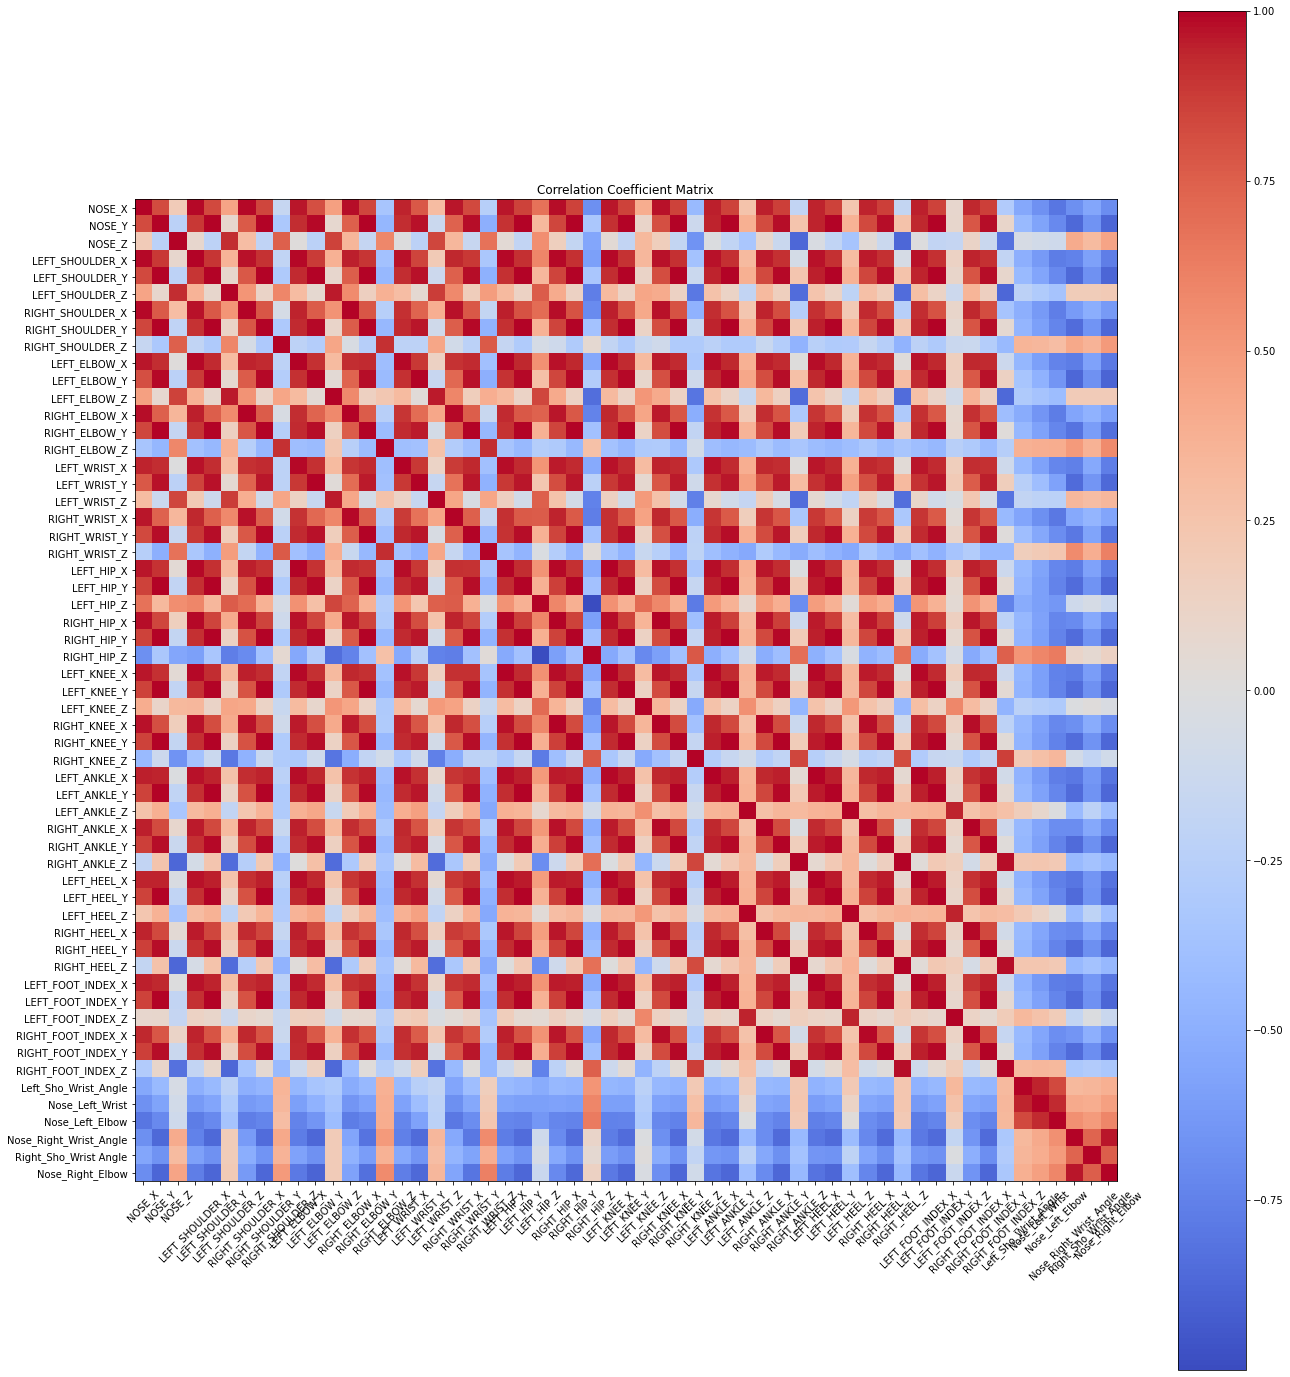

In [375]:
#Extract co-relation matrix and plot the values greater than 0.98

correlation_matrix = model_data.corr()

plt.figure(figsize=(22, 25))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Coefficient Matrix')
plt.show()


In [102]:
feature_columns = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
       'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
       'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
       'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
       'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
       'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
       'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
       'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
       'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
       'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
       'RIGHT_FOOT_INDEX_Z' ,'Left_Sho_Wrist_Angle','Nose_Left_Wrist',
    'Nose_Left_Elbow','Nose_Right_Wrist_Angle','Right_Sho_Wrist Angle','Nose_Right_Elbow']

In [385]:
X.shape

(39542, 57)

In [387]:
#Spilitting the train - test of data

X = input_data[feature_columns]
Y = input_data['Class_1']
#Y = input_data['Class_2']

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


coef_lis = lasso_cross_val(X_train,X_test,y_train,y_test)

new_X = model_data[coef_lis]
new_X_train = X_train[coef_lis]
new_X_test = X_test[coef_lis]
#new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state= None,shuffle=True)

Mean Squared Error: 0.07818394003234998
[0.0010122707524043537, 0.00020193533005896818, 0.0006637879709188563, 0.0016780124548800778, -0.002338086644198157, -0.002179581013765947, -0.002864243363579483, 0.0019371516887924883, 0.0002406482567394735, 0.0025727163576598528, -0.0013328343338533915, 0.0014915433967388088, -5.5868820689326076e-05, 0.00025826450681608955, -0.0008828776405771422, 0.00013074175247442378, 0.002134918343347979, -0.0003690199386034159, -0.0005621143739789359, 0.0028033096486927652, 0.0005962326820058763, -0.0027461713523381625, -0.003163477602193362, 0.0007539301083425636, -0.0006696996945346926, 0.0004215230669131723, -0.00016518532500304616, -0.0010271973205735851, -0.00036380378694193794, -0.000402648235127134, -0.000446803228893171, 0.00014189069349807522, -0.0005680253328134385, 0.0005670609693218456, -0.00019908158916580638, 0.0006234861191692727, 0.0006323545167961126, -8.716326205786116e-05, 0.0005452998072448521, 0.0015098299065387886, -0.0015946846504465

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1062.772957841085, tolerance: 0.6293700639473948
  model = cd_fast.enet_coordinate_descent(


In [ ]:
params,_ = xgb_randomsearch(new_X_train, y_train)
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, **params)
xgb_model.fit(new_X_train, y_train)
save_tunedmodel(xgb_model)

In [ ]:
params,_ = randomforest_randsearch(new_X_train, y_train)
rf_model = RandomForestClassifier(**params)
rf_model.fit(new_X_train, y_train)
save_tunedmodel(rf_model)

In [ ]:
accuract,cf, class_report = model_perfomance(y_test,rf_model.predict(new_X_train))

Deep Learning Model

In [28]:
data=pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\Neural Net In.csv")

In [29]:
X = data[data.columns[-10:-4]]
Y = data[data.columns[-1]]

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3)


X_test_am = X[:101]
Y_test_am = Y[:101]



X_test_pro = X[12115:]
Y_test_pro = Y[12115:]



In [396]:
#Architeture of a simple LSTM model for binary classification
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=None)

model = Sequential()
model.add(LSTM(6, activation='relu', input_shape= (6,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [397]:
lstm = model.fit(X_train,Y_train, batch_size=5, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
1732/1732 [==============================] - 10s 5ms/step - loss: 0.4122 - accuracy: 0.8523 - val_loss: 0.3320 - val_accuracy: 0.8750
Epoch 2/30
1732/1732 [==============================] - 4s 2ms/step - loss: 0.3079 - accuracy: 0.8652 - val_loss: 0.2377 - val_accuracy: 0.8990
Epoch 3/30
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.8912 - val_loss: 0.2327 - val_accuracy: 0.8877
Epoch 4/30
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9037 - val_loss: 0.2028 - val_accuracy: 0.9230
Epoch 5/30
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2191 - accuracy: 0.9085 - val_loss: 0.1998 - val_accuracy: 0.9089
Epoch 6/30
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2119 - accuracy: 0.9113 - val_loss: 0.2051 - val_accuracy: 0.9054
Epoch 7/30
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2068 - accuracy: 0.9142 - val_loss: 0.1896 - val_accuracy

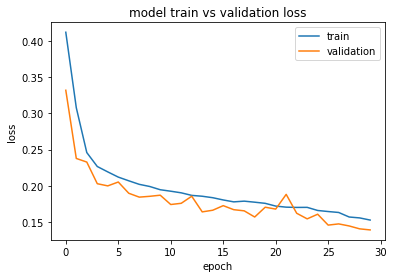

In [407]:
train_loss = lstm.history['loss']
val_loss = lstm.history['val_loss']
loss_graph(train_loss,val_loss)

y_pred = lstm.model.predict(X_test)

#lstm_acc,lstm_cm,lstm_class = model_perfomance(y_test,y_pred)


In [ ]:
lstm.model.save(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\new_lstm\\")

In [402]:
# Function to build your Keras model

def build_model(hidden_units=32, activation='relu', dropout=0.0, num_layers=1):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    
    model.add(Dropout(dropout)) 
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the build_model function
model = KerasClassifier(build_fn=build_model, verbose=0)

# Define parameter grid for GridSearch
param_grid = {
    'hidden_units': [5,6,8,32],
    'batch_size' : [5,10,20,25],
    'dropout_rate': [0.0, 0.2, 0.4],
    'activation' : ['tanh','relu','sigmoid'],
    'num_layers': [1, 2, 3]
}



In [18]:
# Perform GridSearchCV for hyperparameters
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=kfold, verbose=1)
grid_out = grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_out.best_score_, grid_out.best_params_))

Best: 0.934533 using {'activation': 'relu', 'batch_size': 5, 'dropout_rate': 0.0, 'hidden_units': 32, 'num_layers': 3}

In [ ]:
keras_model = estimator.fit(X_train,y_train)

In [ ]:
accuracy,cf, class_report = model_perfomance(y_test,keras_model.predict(new_X_train))

In [ ]:
train_loss = ker_model.history['loss']
val_loss = ker_model.history['val_loss']
loss_graph(train_loss,val_loss)

In [32]:
y_pred = np.round(ker_model.predict(X_test))
print(model_perfomance(y_test,y_pred))

(0.8855064655172413, array([[ 359,  402],
       [  23, 2928]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.94      0.47      0.63       761\n           1       0.88      0.99      0.93      2951\n\n    accuracy                           0.89      3712\n   macro avg       0.91      0.73      0.78      3712\nweighted avg       0.89      0.89      0.87      3712\n')


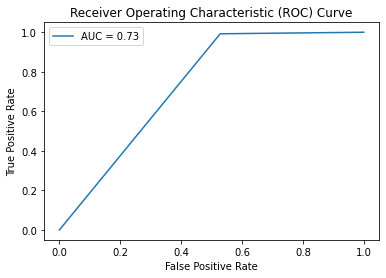

In [44]:
draw_auc(y_test,y_pred)

In [ ]:
keras_model.save(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras')

In [ ]:
out = ker_model.predict(X_test_pro)
message(out)
#print(hit,toss,mid)

In [20]:
xgBoost_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\xgb_model.pkl","rb"))

xgBoost_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\xgb_model.pkl", "rb"))

ker_model = keras.models.load_model(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras")

lstm_model = load_model(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\old_lstm\\")

In [94]:
#Reading video using cv2


cap = cv2.VideoCapture(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\Test\20230802_183702.mp4")

#cap = cv2.VideoCapture(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\Test\cam 5 slow.mov")
    
#cap = cv2.VideoCapture(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\Test\ewan 3 slow.mov")

#cap = cv2.VideoCapture(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\Test\Kev s 1.mov")
        
df = process_video(cap)

In [95]:
nose_ryt_wrist = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['RIGHT_WRIST_X'],df['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(df['RIGHT_SHOULDER_X'],df['RIGHT_SHOULDER_Y'],df['RIGHT_WRIST_X'],df['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['RIGHT_ELBOW_X'],df['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(df['LEFT_SHOULDER_X'],df['LEFT_SHOULDER_Y'],df['LEFT_WRIST_X'],df['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['LEFT_WRIST_X'],df['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['LEFT_ELBOW_X'],df['LEFT_ELBOW_Y'])


df['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
df['Right_Sho_Wrist Angle'] = sho_ryt_wrist
df['Nose_Right_Elbow'] = nose_ryt_elb
df['Left_Sho_Wrist_Angle'] = sho_left_wrist
df['Nose_Left_Wrist'] = nose_left_wrist
df['Nose_Left_Elbow'] = nose_left_elb


In [96]:
coef_lis = df.columns

Pred = df[coef_lis]

In [97]:
class1 = xgBoost_hit.predict(Pred[xgBoost_hit.feature_names_in_])
class2 = xgBoost_toss.predict(Pred[xgBoost_toss.feature_names_in_])
df['Class_1'] = class1
df['Class_2'] = class2

In [98]:
start,stop = find_index(df)

In [99]:

#Taking only the key frame's data from the dataframe

new_df = df.iloc[start:stop+5]
new_df = new_df[new_df.columns[:-2]]

In [100]:
input_data = new_df.iloc[-1][-6:].values.reshape(1, 6, 1)  # Reshape input data to (1, 6, 1) shape

Output = lstm_model.predict(input_data)

message(Output)


Hello.............
You are an unprofessional Player...
Your way of tossing the ball and getting prepared for hitting the ball and the hit can be improved..


In [101]:
Output

array([[0.00190687]], dtype=float32)